# AlphaGo 

## AlphaGo中的四个网络

### 减少搜索深度的方法：价值函数 $v_\pi(s)$

- 局面评估函数（状态价值函数） $v_\pi(s) \approx v_*(s)$口如果 $v_*(s)$ 已知, 只需要一层搜索就可得到最优行动口如果有近似 $v_\pi(s)$, 则可往前搜索几步。

- 由于状态数目太多，不是用表格的方法来处理 $v_\pi(s)$, 而是用某种带参数的函数 (例如, 神经网络) 来近似它:
$$
\hat{v}(s ; \mathbf{w}) \approx v_\pi(s)
$$

- 用模拟或真实数据（轨迹）来训练 $\hat{v}(s ; \mathbf{w})$ 以确定 $\mathbf{w}$ 。
- 这样得到的结果将有泛化能力, 能够处理以前没有见过的状态。

### 甚至可以用监督学习来获得策略函数

- 策略网络：输入当前棋局状态，输出落子位置。
- 13层-深度卷积神经网络。
A final softmax layer outputs a probability distribution over all legal moves: $y_i=a_i=\frac{e^{z_i}}{\sum_i e^{z_i}}$

- Using stochastic gradient ascent to maximize the likelihood of the human move a selected in state $s$

- 数据: （6-9段，16万局） 30 million positions from the KGS Go Server（棋圣堂围棋服务器, Kiseido Go Server）, and 30 million positions generated by fast rollout policy.

### 强化学习的引入：策略梯度方法
- 在前面的 $p_\sigma$ 基础上, 让不同策略网络互相对亪, 相当于 MC方法。

- 赢棋 $R_T=+1$, 输棋 $R_T=-1$
- 策略梯度方法:
$$
\Delta \rho \propto \frac{\partial \ln p_\rho\left(a_t \mid s_t\right)}{\partial \rho} R_T
$$

- 为了防止过拟合，建立一个对手池（包括整个训练过程中形成的所有策略），并从中随机选择对手。

- 得到的 $p_\rho$ 与前面的监督学习 $p_\sigma$ 对恋, 胜率 $80 \%$ 。
- 与KGS上业余选手二段的程序Pachi的胜率是 $85 \%$

### 强化学习价值函数 $v_\theta(s)$
- 与专业选手相比, 根据策略网络 $p_\rho$ 进行落子效果不佳（缺乏全局观）; 而如果将它与 Monte-Carlo 相结合则速度太慢。
- 还是计算状态价值网络（函数） $v_\theta(s)$!
- 利用 $p_\rho$ 自我对恋三千万盘的结果来训练 $v_\theta(s)$结果:

- 结果：性能与 $p_\rho+\mathrm{MC}$ 或 $p_\sigma+\mathrm{MC}$ 接近但速度快15000倍。
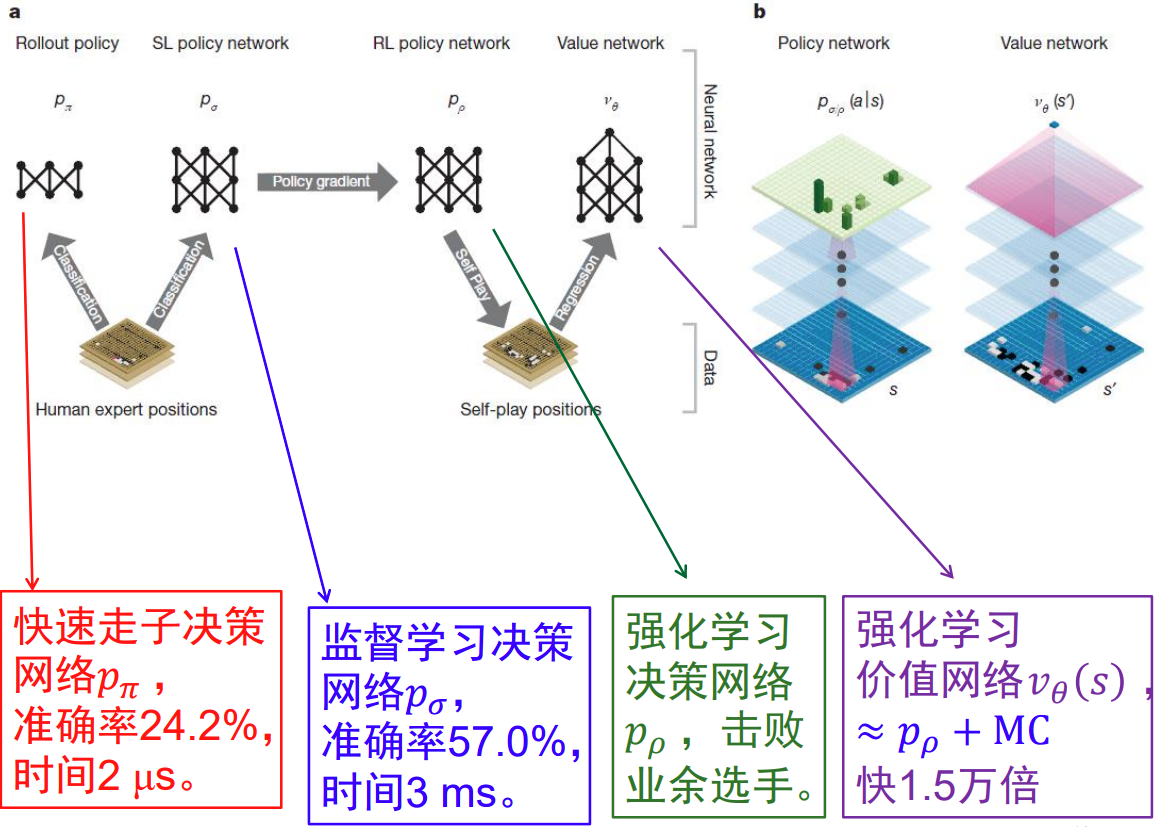

## AlphaGo中的蒙特卡罗树搜索

### 减少搜索宽度的方法：轨迹采样

- 例如, 通过蒙特卡罗模拟评估策略 $\pi$ 下的动作价值函数 $q_\pi(s, a)$, 并采用贪心算法进行当前步的决策。

- 根据策略改进定理, 此时的效果一般好于策略 $\pi$

- 经常只对当前状态 $S_t$ 进行评估（Planning at Decision Time），而且决策后不保存 $Q\left(S_t, a\right)$ 结果，被称为

  - Rollout（快速走子）算法或Monte Carlo rollouts。

### 更好的做法：蒙特卡罗树搜索 (MCTS)
- 临时决策，通过某种蒙特卡罗搜索来估计动作价值函数。聚焦于模拟轨迹中获得较高评估值的片段（部分），即 “更值得搜索的变化”。

- 模拟时使用某种近似的快速走子（rollout）策略,结合有限深度的树结构的状态价值（根据模拟结果不断更新）。
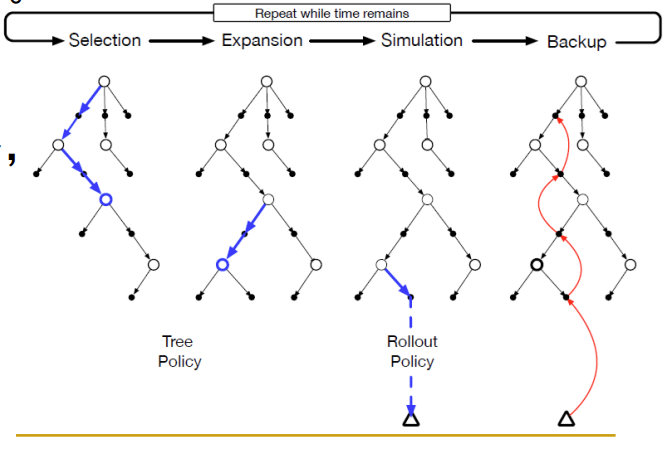
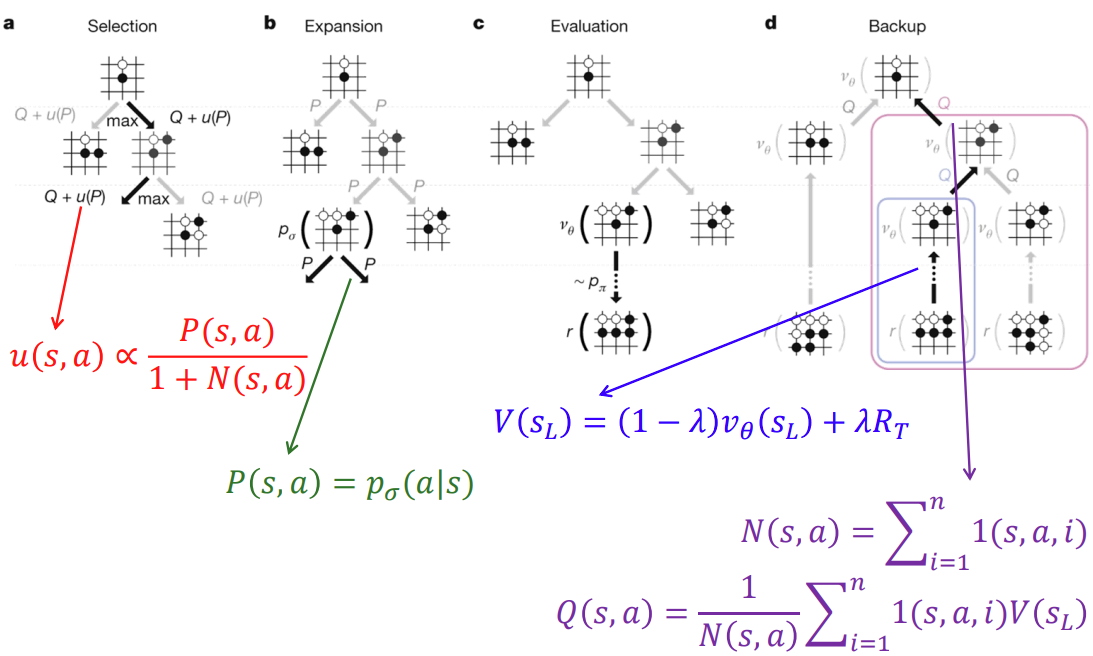

## AlphaGo Zero

### MCTS

$$
U(s, a) \propto P(s, a) \frac{\sqrt{\sum_a N(s, a)}}{1+N(s, a)}
$$

在叶节点不往后做快速走子的模拟，只利用网络预测 $v(s)$ 并回溯。

走子决定: $\pi_a \propto N(s, a)^{1 / \tau}$ ，其中 $\tau$ 是参数。